# Plots: bar plots

In [1]:
import sys
sys.path.append("..\\source\\")
import utils as utils
import glob

# Data and numbers
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from math import log10, floor

# Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
import matplotlib.dates as mdates
mpl.style.use('ggplot')
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

# Palettes
from matplotlib.colors import ListedColormap
from palettable.colorbrewer.qualitative import Set2_8

In [2]:
path_proc = "..\\data\\processed\\"
path_data = f"{path_proc}summary\\"
path_meta = "..\\data\\original\\metadata\\"
path_res = "..\\results\\by_bdg\\"
path_fig = "..\\figures\\"

In [3]:
meters_name = {"electricity": "electricity",
                "chilledwater":"chilled water",
                "hotwater": "hot water",
                "steam": "steam"}

In [4]:
ref = {0:"Good fit", 
1:"A1", 
2:"A2", 
3:"A3", 
4:"A4", 
5:"B1",
6:"B2",
7:"B3",
8:"B4",
9:"C1",
10:"C2",
11:"C3",
12:"C4",
13:"D1",
14:"D2",
15:"D3",
16:"D4",
17:"Undefined"}

In [5]:
#color blind
color_ref = {0:"silver",
1:plt.cm.tab20(6), # red
2:plt.cm.tab20(7), #light red
3:plt.cm.tab20(2), # orange
4:plt.cm.tab20(3), # light orange
5:plt.cm.tab20(4), # green
6:plt.cm.tab20(5), # light green
7:plt.cm.tab20(16), # yellow
8:plt.cm.tab20(17), # light yellow
9:plt.cm.tab20(0), # blue
10:plt.cm.tab20(1), # light blue
11:plt.cm.tab20(18), # cyan
12:plt.cm.tab20(19), # light cyan?
13:plt.cm.tab20(8),  # violet
14:plt.cm.tab20(9), # light violet
15:plt.cm.tab20(12), # pink
16:plt.cm.tab20(13), # light pink
17:"white"}

In [6]:
cmap = [color_ref[0],
color_ref[1], 
color_ref[2],
color_ref[3],
color_ref[4], 
color_ref[5], 
color_ref[6], 
color_ref[7], 
color_ref[8],
color_ref[9], 
color_ref[10],
color_ref[11],
color_ref[12],
color_ref[13], 
color_ref[14],
color_ref[15],
color_ref[16],
color_ref[17]]

In [7]:
meters = ["electricity","chilledwater","steam","hotwater"]
sites = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

# Functions

In [8]:
#round to sig significant figures
def round_sig(x, sig=3):
    return round(x, sig-int(floor(log10(abs(x))))-1)

In [9]:
def get_sites(path_data, path_meta, meter):
    # Load original data
    df = pd.read_pickle(path_data + f"date_vs_bdg\\{meter}_RMSLE.pickle.gz")
    # Merge with metadata
    meta_bdg = pd.read_csv(path_meta + "building_metadata.csv")
    df = pd.merge(df, meta_bdg, how="left", on="building_id")
    # List of buildings and sites
    bdgs = list(df.building_id.unique())
    sites = list(df.site_id.unique())
    print(f"sites: {len(sites)}. Buildings: {len(bdgs)}")

    return sites

In [10]:
def error_df_all(path_error, meter, site):

    # Good fit
    error0 = pd.read_csv(path_res + f"{meter}_Z_site{site}.csv")
    df_error = error0.copy()
    df_error = df_error.replace(1,0)

    # In range single bdg
    error1 = pd.read_csv(path_res + f"{meter}_A1_site{site}.csv")
    df_error.update(error1)
    df_error = df_error.replace(1,99)

    error2 = pd.read_csv(path_res + f"{meter}_A2_site{site}.csv")
    df_error.update(error2)
    df_error = df_error.replace(1,2)

    error3 = pd.read_csv(path_res + f"{meter}_A3_site{site}.csv")
    df_error.update(error3)
    df_error = df_error.replace(1,3)

    error4 = pd.read_csv(path_res + f"{meter}_A4_site{site}.csv")
    df_error.update(error4)
    df_error = df_error.replace(1,4)

    # in range multiple bdg
    error9 = pd.read_csv(path_res + f"{meter}_C1_site{site}.csv")
    df_error.update(error9)
    df_error = df_error.replace(1,9)

    error10 = pd.read_csv(path_res + f"{meter}_C2_site{site}.csv")
    df_error.update(error10)
    df_error = df_error.replace(1,10)

    error11 = pd.read_csv(path_res + f"{meter}_C3_site{site}.csv")
    df_error.update(error11)
    df_error = df_error.replace(1,11)

    error12 = pd.read_csv(path_res + f"{meter}_C4_site{site}.csv")
    df_error.update(error12)
    df_error = df_error.replace(1,12)

    # Out of range single bdg
    error5 = pd.read_csv(path_res + f"{meter}_B1_site{site}.csv")
    df_error.update(error5)
    df_error = df_error.replace(1,5)

    error6 = pd.read_csv(path_res + f"{meter}_B2_site{site}.csv")
    df_error.update(error6)
    df_error = df_error.replace(1,6)

    error7 = pd.read_csv(path_res + f"{meter}_B3_site{site}.csv")
    df_error.update(error7)
    df_error = df_error.replace(1,7)

    error8 = pd.read_csv(path_res + f"{meter}_B4_site{site}.csv")
    df_error.update(error8)
    df_error = df_error.replace(1,8)

    # Out of range multiple bdg
    error13 = pd.read_csv(path_res + f"{meter}_D1_site{site}.csv")
    df_error.update(error13)
    df_error = df_error.replace(1,13)

    error14 = pd.read_csv(path_res + f"{meter}_D2_site{site}.csv")
    df_error.update(error14)
    df_error = df_error.replace(1,14)

    error15 = pd.read_csv(path_res + f"{meter}_D3_site{site}.csv")
    df_error.update(error15)
    df_error = df_error.replace(1,15)

    error16 = pd.read_csv(path_res + f"{meter}_D4_site{site}.csv")
    df_error.update(error16)
    df_error = df_error.replace(1,16)

    df_error = df_error.replace(99,1)

    # Undefined
    df_error = df_error.fillna(17)

    df_error = df_error.apply(pd.to_numeric, errors='coerce')
    df_error.set_index("building_id",inplace=True)
    print(f"Site {site} error's dataframe created.")
    errors_type = df_error.melt().value.unique()
    
    return df_error, errors_type

# Number of meters

In [11]:
meta = pd.read_csv(path_meta + "building_metadata.csv", usecols=["site_id","building_id","primary_use"])

In [12]:
files_leaked = glob.glob("..\\data\\leaked\\*.csv")
dfs = []
for file in files_leaked:
    meter = file.split("\\")[-1].split("_")[-1].split(".")[0]
    df = pd.read_csv(file)
    df["meter"] = meter
    dfs.append(df)
leaked_bdgs = pd.concat(dfs)
leaked_bdgs.head(10)

,building_id,meter
0,7,chilledwater
1,9,chilledwater
2,13,chilledwater
3,14,chilledwater
4,15,chilledwater
5,28,chilledwater
6,29,chilledwater
7,30,chilledwater
8,31,chilledwater
9,43,chilledwater


In [13]:
# total buildings per site
bdgs_per_site = meta.groupby("site_id").count().to_dict()["building_id"]
bdgs_per_site

{0: 105,
 1: 51,
 2: 135,
 3: 274,
 4: 91,
 5: 89,
 6: 44,
 7: 15,
 8: 70,
 9: 124,
 10: 30,
 11: 5,
 12: 36,
 13: 154,
 14: 102,
 15: 124}

In [14]:
# number of meters on each site, pero metertype (leaked buildings already removed in arrays)
meters = ["electricity","chilledwater","steam","hotwater"]
meters_per_site = {}
for meter in meters:
    meters_per_site[meter] = {}
    files = glob.glob(path_proc + f"arrays\\{meter}*.csv")
    for file in files:
        site = int(file.split("_")[-1].split(".")[0])
        df = pd.read_csv(file, usecols=["building_id"])
        meters_per_site[meter][site] = len(df)
meters_per_site

{'electricity': {10: 30,
  11: 5,
  12: 36,
  13: 141,
  14: 102,
  3: 274,
  4: 10,
  5: 89,
  6: 36,
  7: 12,
  8: 70,
  9: 122},
 'chilledwater': {10: 9, 11: 4, 13: 80, 14: 86, 6: 21, 7: 15, 9: 95},
 'steam': {13: 88, 14: 43, 6: 23, 7: 12, 9: 89},
 'hotwater': {1: 12, 10: 11, 11: 5, 14: 57, 7: 3}}

In [15]:
# total number of meters per metertype
meters_per_meter = {}
for key in meters_per_site.keys():
    meters_per_meter[key] = sum(meters_per_site[key].values())
meters_per_meter

{'electricity': 927, 'chilledwater': 310, 'steam': 255, 'hotwater': 88}

In [16]:
# total number of buildings per primary use (leaked are included here)
dict(meta.groupby("primary_use")["building_id"].count())

{'Education': 549,
 'Entertainment/public assembly': 184,
 'Food sales and service': 5,
 'Healthcare': 23,
 'Lodging/residential': 147,
 'Manufacturing/industrial': 12,
 'Office': 279,
 'Other': 25,
 'Parking': 22,
 'Public services': 156,
 'Religious worship': 3,
 'Retail': 11,
 'Services': 10,
 'Technology/science': 6,
 'Utility': 4,
 'Warehouse/storage': 13}

In [17]:
# total number of meter per primary use (leaked are not included here)
meters = ["electricity","chilledwater","steam","hotwater"]
uses = list(meta.primary_use.unique())

dfs = []
for meter in meters:
    files = glob.glob(path_proc + f"arrays\\{meter}*.csv")
    for file in files:
        site = int(file.split("_")[-1].split(".")[0])
        df = pd.read_csv(file, usecols=["building_id"])
        df = pd.merge(df, meta, how="left", on="building_id")
        dfs.append(df)

meters_per_use = dict(pd.concat(dfs).groupby("primary_use")["building_id"].count())
meters_per_use

{'Education': 597,
 'Entertainment/public assembly': 185,
 'Food sales and service': 8,
 'Healthcare': 43,
 'Lodging/residential': 129,
 'Manufacturing/industrial': 11,
 'Office': 375,
 'Other': 23,
 'Parking': 12,
 'Public services': 165,
 'Religious worship': 1,
 'Retail': 4,
 'Services': 11,
 'Technology/science': 5,
 'Warehouse/storage': 11}

# Stacked bars plots

## Figure 7
Per each meter, two barplots are showed:
- good fit / in range errors / out of range errors percentage
- good fit, A, B, C, D (all subtypes sum) RMSLE contribution

In [18]:
good_fit = [0]
in_range = [1,2,3,4,9,10,11,12]
out_range = [5,6,7,8,13,14,15,16]

def error_range(x):
    if x in good_fit:
        return 0
    elif x in in_range:
        return 1
    else:
        return 2

In [19]:
good_fit = [0]
A = [1,2,3,4]
B = [5,6,7,8]
C = [9,10,11,12]
D = [13,14,15,16]

def error_group(x):
    if x in good_fit:
        return "good_fit"
    elif x in A:
        return "A"
    elif x in B:
        return "B"
    elif x in C:
        return "C"
    else:
        return "D"

In [20]:
# Dataset for ploting good fit/in range error/out of range error

## Load metadata
meta = pd.read_csv(path_meta + "building_metadata.csv",usecols=["building_id","site_id"])

errors_range_list = [] # this will be for plotting errror/non-error frequency
rmsle_list = [] # this will be for plotting rmsle magnitude

for meter in meters:
    print(f"\nMETER: {meter}")

    df_list = []
    df_rmsle_list = []

    for site in sites:

        try:
            df_error, error_types = error_df_all(path_res, meter, site)
            # This will be used for the frequrency barplots
            df_freq = df_error.melt().groupby("value").count().reset_index().rename(columns={"value":"error_code","variable":"error_count"})
            df_freq["site_id"] = site
            df_freq["total"] = df_freq.error_count.sum()
            df_list.append(df_freq)

        except:
            print(f"Site {site} not available.")
            continue

        # This will be used for the rmsle barplot
        df_rmsle = df_error.reset_index().melt(id_vars="building_id", var_name="timestamp") # errors df
        df_rmsle.timestamp = pd.to_datetime(df_rmsle.timestamp, format="%Y-%m-%d")
        # Filter errors
        #df_rmsle = df_rmsle[df_rmsle.value != 0]
        # Add site_id
        df_rmsle["site_id"] = site
        # Add to list
        df_rmsle_list.append(df_rmsle)


    # Create frequency dfs
    df = pd.concat(df_list)

    # Tag errors (0:good fit, 1: in range, 2: out of range)
    df["range"] = [error_range(x) for x in df.error_code]
    # Add pct
    df["pct"] = (df.error_count / df.total) * 100

    # Dataset for ploting good fit/in range error/out of range error
    errors_total = pd.DataFrame(df.groupby(["site_id","range"])["pct"].sum()).reset_index()
    # Correct format for stacked plot
    errors_total = errors_total.pivot(columns="range",values="pct",index="site_id")
    errors_total = errors_total.sort_values(0,ascending=True)
    errors_range_list.append(errors_total)

    # Creates rmsle df
    errors = pd.concat(df_rmsle_list)
    errors.timestamp = pd.to_datetime(errors.timestamp, format="%Y-%m-%d")
    errors.rename(columns={"value":"error"},inplace=True)
    ## Load RMSLE dataframe
    df1 = pd.read_pickle(path_data + f"{meter}_RMSLE.pickle.gz")
    df1.timestamp = pd.to_datetime(df1.timestamp, format="%Y-%m-%d")
    ## Add site_id
    df1 = pd.merge(df1,meta,how="left",on="building_id")
    ## Merge
    rmsle = pd.merge(errors, df1, how="left", on=["building_id","site_id","timestamp"])
    ## Sums RMSLE metric for each error type in site
    sums = pd.DataFrame(rmsle.groupby(["site_id","error"])["rmsle"].sum()).reset_index()
    # Replace error name
    sums["error"] = [error_group(x) for x in sums.error]
    # Group
    sums = sums.groupby(["site_id","error"]).sum().reset_index()
    # Format for stacked barplot (percentage distribution)
    sums = sums.pivot(index="site_id",values="rmsle",columns="error")
    # Calculate total RMSLE error per building
    sums["rmsle_total"] = sums.sum(axis=1)
    for col in sums.columns[:-1]:
        sums[col] = (sums[col]/sums["rmsle_total"]) * 100
    sums.drop(["rmsle_total"],axis=1, inplace=True)
    sums = sums.reindex(errors_total.index)
    rmsle_list.append(sums)


METER: electricity
Site 0 not available.
Site 1 not available.
Site 2 not available.
Site 3 error's dataframe created.
Site 4 error's dataframe created.
Site 5 error's dataframe created.
Site 6 error's dataframe created.
Site 7 error's dataframe created.
Site 8 error's dataframe created.
Site 9 error's dataframe created.
Site 10 error's dataframe created.
Site 11 error's dataframe created.
Site 12 error's dataframe created.
Site 13 error's dataframe created.
Site 14 error's dataframe created.
Site 15 not available.

METER: chilledwater
Site 0 not available.
Site 1 not available.
Site 2 not available.
Site 3 not available.
Site 4 not available.
Site 5 not available.
Site 6 error's dataframe created.
Site 7 error's dataframe created.
Site 8 not available.
Site 9 error's dataframe created.
Site 10 error's dataframe created.
Site 11 error's dataframe created.
Site 12 not available.
Site 13 error's dataframe created.
Site 14 error's dataframe created.
Site 15 not available.

METER: steam
S

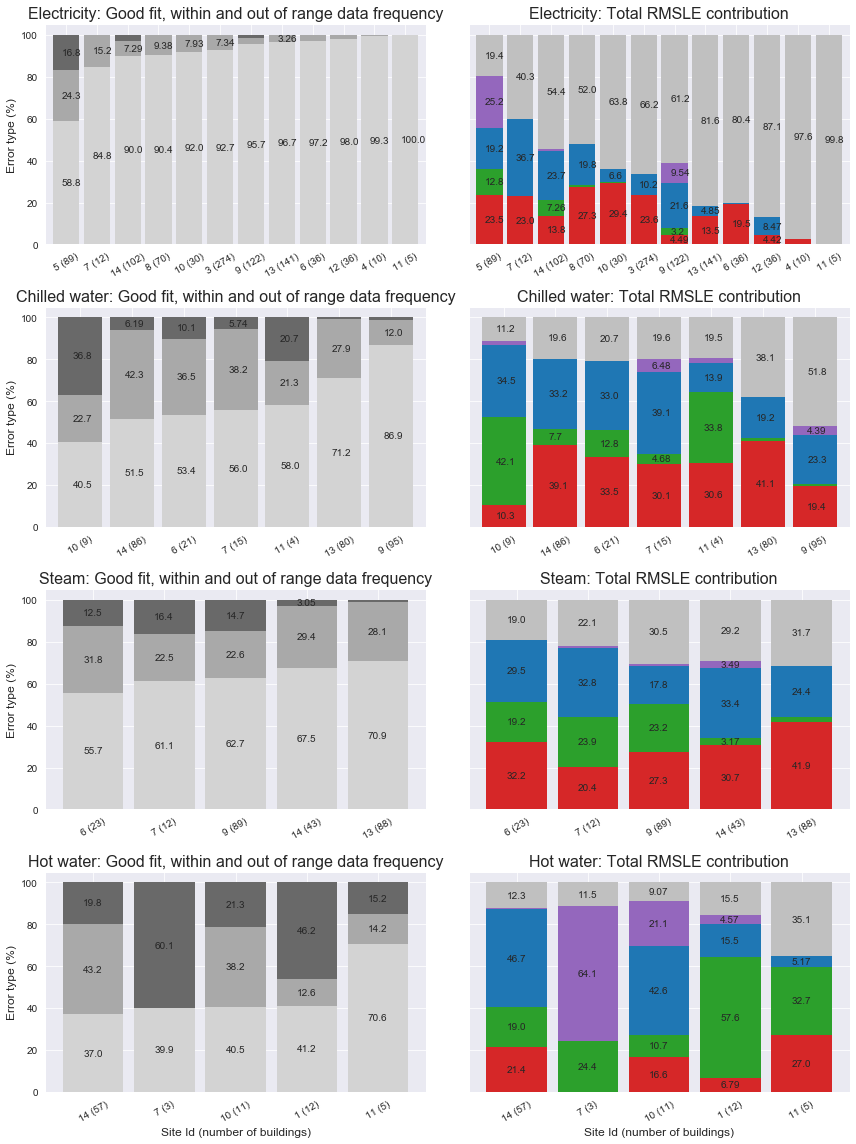

In [21]:
## Plot
meters = ["electricity","chilledwater","steam","hotwater"]

pal1 =["lightgray","darkgray","dimgrey"]
pal2 = [cmap[1],cmap[5],cmap[9],cmap[13],cmap[0]]

fig, axes = plt.subplots(4, 2, sharex=False, sharey=True, figsize=(12,16)) # original (12,16)
axes = axes.flatten()

i=0
for meter,errors_range,rmsle in zip(meters, errors_range_list, rmsle_list):

    #convert to str to avoid blank spaces between bars with non-consecutive numbers
    errors_range.index = errors_range.index.astype("str")
    rmsle.index = rmsle.index.astype("str")

    # Plot range errors
    ax1 = axes[i]
    plot1 = errors_range.plot(kind='bar', stacked=True, color=pal1, ax=ax1, width=0.85, legend=False, linewidth=0)
    ax1.set_title(f"{meters_name[meter].capitalize()}: Good fit, within and out of range data frequency", fontsize=16)
    ax1.set_xlabel("")
    ax1.set_ylabel("Error type (%)")
    ax1.set_xticklabels([f"{i} ({meters_per_site[meter][int(i)]})" for i in errors_range.index], rotation=30)  # site (number of buidings)
    # Show pct on bar
    for rec in ax1.patches:
        width = rec.get_width()
        height = rec.get_height()
        if height >= 3:
            ax1.text(rec.get_x() + width/3, 
                    rec.get_y() + height/2,
                    f"{round_sig(height,sig=3)}",
                    ha='left', 
                    va='center',
                    fontsize=10)

    # Plot RMSLE
    ax3 = axes[i+1]
    plot3 = rmsle.plot(kind='bar', stacked=True, color=pal2, ax=ax3, width=0.85, legend=False, linewidth=0)
    ax3.set_title(f"{meters_name[meter].capitalize()}: Total RMSLE contribution", fontsize=16)
    ax3.set_xlabel("")
    ax3.set_ylabel("Error type (%)")
    ax3.set_xticklabels([f"{i} ({meters_per_site[meter][int(i)]})" for i in errors_range.index], rotation=30)
    # Show pct on bar
    for rec in ax3.patches:
        width = rec.get_width()
        height = rec.get_height()
        if height >= 3:
            ax3.text(rec.get_x() + width/3, 
                    rec.get_y() + height/2,
                    f"{round_sig(height,sig=3)}",
                    ha='left', 
                    va='center',
                    fontsize=10)

    '''if i == 0:
        handles1, labels1 = ax1.get_legend_handles_labels()
        ax1.legend(handles1, ["Good fit","Within range","Out of range"], title="Data", loc ='lower right')

        handles3,labels3 = ax3.get_legend_handles_labels()
        labels = ["A","B","C","D","Good fit"]
        ax3.legend(handles3,labels,title='RMSLE', loc="upper right")'''
    if i == 6:
        ax1.set_xlabel("Site Id (number of buildings)")
        ax3.set_xlabel("Site Id (number of buildings)")

    i = i+2
    
    plt.tight_layout()

fig.savefig(path_fig + "barplot_stacked_cb.pdf", dpi=150, bbox_inches="tight")
#fig.savefig(path_fig + "barplot_stacked_cb.png", dpi=150, bbox_inches="tight")

## Figure 6
Per each meter, 4 barplots are shown: A, B, C, D divided in subtypes.

In [22]:
def add_total(x):
    if "A" in x:
        return total_A
    elif "B" in x:
        return total_B
    elif "C" in x:
        return total_C
    elif "D" in x:
        return total_D
    else:
        return np.nan

In [23]:
# Dataset for ploting error subtypes

## Load metadata
meta = pd.read_csv(path_meta + "building_metadata.csv",usecols=["building_id","site_id"])

errors_type = []

for meter in meters:
    print(f"\nMETER: {meter}")

    df_list = []

    for site in sites:

        try:
            df_error, error_types = error_df_all(path_res, meter, site)
            # This will be used for the frequrency barplots
            df_freq = df_error.melt().groupby("value").count().reset_index().rename(columns={"value":"error_code","variable":"error_count"})
            df_freq["site_id"] = site
            df_list.append(df_freq)

        except:
            print(f"Site {site} not available.")
            continue

    # Create frequency dfs
    df = pd.concat(df_list)
    # Tag errors
    df["error_code"] = [ref[x] for x in df.error_code]
    # Remove good fit
    df = df[df.error_code != "Good fit"]
    # Get total by site and error type (A, B, C, D)
    total_dfs = []
    for site in df.site_id.unique():
        temp = df[df.site_id == site].reset_index(drop=True)
        # Totals
        total_A = sum([x for (i,x) in enumerate(temp.error_count) if "A" in temp.error_code[i]])
        total_B = sum([x for (i,x) in enumerate(temp.error_count) if "B" in temp.error_code[i]])
        total_C = sum([x for (i,x) in enumerate(temp.error_count) if "C" in temp.error_code[i]])
        total_D = sum([x for (i,x) in enumerate(temp.error_count) if "D" in temp.error_code[i]])
        temp["total"] = [add_total(x) for x in temp.error_code]
        # Add to list
        total_dfs.append(temp)
    # Concat
    df = pd.concat(total_dfs)
    # Calculate pct
    df["pct"] = (df.error_count / df.total) * 100
    # Pivot
    df = df.pivot(columns="error_code",values="pct",index="site_id")
    #add to list
    errors_type.append(df)


METER: electricity
Site 0 not available.
Site 1 not available.
Site 2 not available.
Site 3 error's dataframe created.
Site 4 error's dataframe created.
Site 5 error's dataframe created.
Site 6 error's dataframe created.
Site 7 error's dataframe created.
Site 8 error's dataframe created.
Site 9 error's dataframe created.
Site 10 error's dataframe created.
Site 11 error's dataframe created.
Site 12 error's dataframe created.
Site 13 error's dataframe created.
Site 14 error's dataframe created.
Site 15 not available.

METER: chilledwater
Site 0 not available.
Site 1 not available.
Site 2 not available.
Site 3 not available.
Site 4 not available.
Site 5 not available.
Site 6 error's dataframe created.
Site 7 error's dataframe created.
Site 8 not available.
Site 9 error's dataframe created.
Site 10 error's dataframe created.
Site 11 error's dataframe created.
Site 12 not available.
Site 13 error's dataframe created.
Site 14 error's dataframe created.
Site 15 not available.

METER: steam
S

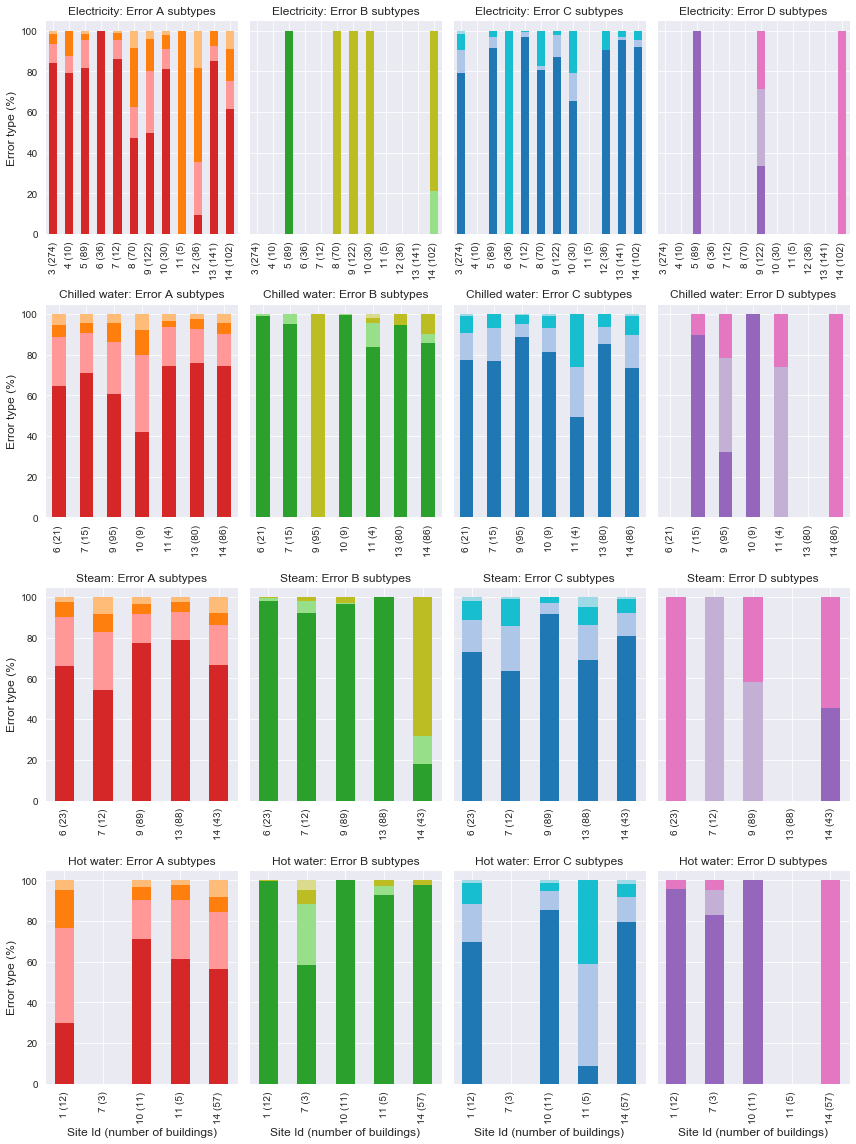

In [24]:
## Plot
meters = ["electricity","chilledwater","steam","hotwater"]

palA = [cmap[1],cmap[2],cmap[3],cmap[4]]
palB = [cmap[5],cmap[6],cmap[7],cmap[8]]
palC = [cmap[9],cmap[10],cmap[11],cmap[12]]
palD = [cmap[13],cmap[14],cmap[15],cmap[16]]


fig, axes = plt.subplots(4, 4, sharex=False, sharey=True, figsize=(12,16))
axes = axes.flatten()

i=0
for meter,error_type in zip(meters, errors_type):

    error_type.index = error_type.index.astype("str")

    # Plot A
    temp = error_type.loc[:,error_type.columns.str.contains("A")]
    axA = axes[i]
    plotA = temp.plot(kind='bar', stacked=True, color=palA, ax=axA, width=0.5, legend=False, linewidth=0)
    axA.set_title(f"{meters_name[meter].capitalize()}: Error A subtypes", fontsize=12)
    axA.set_xlabel("")
    axA.set_ylabel("Error type (%)")
    axA.set_xticklabels([f"{i} ({meters_per_site[meter][int(i)]})" for i in temp.index], rotation=90)

    # Plot B
    temp = error_type.loc[:,error_type.columns.str.contains("B")]
    axB = axes[i+1]
    plotB = temp.plot(kind='bar', stacked=True, color=palB, ax=axB, width=0.5, legend=False, linewidth=0)
    axB.set_title(f"{meters_name[meter].capitalize()}: Error B subtypes", fontsize=12)
    axB.set_xlabel("")
    axB.set_ylabel("Error type (%)")
    axB.set_xticklabels([f"{i} ({meters_per_site[meter][int(i)]})" for i in temp.index], rotation=90)

    # Plot C
    temp = error_type.loc[:,error_type.columns.str.contains("C")]
    axC = axes[i+2]
    plotC = temp.plot(kind='bar', stacked=True, color=palC, ax=axC, width=0.5, legend=False, linewidth=0)
    axC.set_title(f"{meters_name[meter].capitalize()}: Error C subtypes", fontsize=12)
    axC.set_xlabel("")
    axC.set_ylabel("Error type (%)")
    axC.set_xticklabels([f"{i} ({meters_per_site[meter][int(i)]})" for i in temp.index], rotation=90)

    # Plot D
    temp = error_type.loc[:,error_type.columns.str.contains("D")]
    axD = axes[i+3]
    plotD = temp.plot(kind='bar', stacked=True, color=palD, ax=axD, width=0.5, legend=False, linewidth=0)
    axD.set_title(f"{meters_name[meter].capitalize()}: Error D subtypes", fontsize=12)
    axD.set_xlabel("")
    axD.set_ylabel("Error type (%)")
    axD.set_xticklabels([f"{i} ({meters_per_site[meter][int(i)]})" for i in temp.index], rotation=90)

    ''' if i == 12:
        axA.legend(title='', loc="lower left")
        axB.legend(title='', loc="lower left")
        axC.legend(title='', loc="lower left")
        axD.legend(title='', loc="lower left")'''
    if i == 12:
         axA.set_xlabel("Site Id (number of buildings)")
         axB.set_xlabel("Site Id (number of buildings)")
         axC.set_xlabel("Site Id (number of buildings)")
         axD.set_xlabel("Site Id (number of buildings)")

    i = i+4

    plt.tight_layout()

fig.savefig(path_fig + "barplot_stacked_subtypes_cb.pdf", dpi=150, bbox_inches="tight")
#fig.savefig(path_fig + "barplot_stacked_subtypes_cb.png", dpi=150, bbox_inches="tight")

## Figure 10
horizontal barplots with frequencies.

In [25]:
def type_group(x):
    if "A" in x:
        return "A"
    elif "B" in x:
        return "B"
    elif "C" in x:
        return "C"
    elif "D" in x:
        return "D"
    else:
        return "Good fit" 

In [26]:
def add_total(x):
    if "A" in x:
        return total_A
    elif "B" in x:
        return total_B
    elif "C" in x:
        return total_C
    elif "D" in x:
        return total_D
    else:
        return np.nan

In [47]:
## Load metadata
meta = pd.read_csv(path_meta + "building_metadata.csv",usecols=["building_id","site_id"])

error_list = []

for meter in meters:
    print(f"\nMETER: {meter}")

    df_list = []

    for site in sites:

        try:
            df_error, error_types = error_df_all(path_res, meter, site)
            # This will be used for the frequrency barplots
            df_freq = df_error.melt().groupby("value").count().reset_index().rename(columns={"value":"error_code","variable":"error_count"})
            df_freq["site_id"] = site
            df_freq["total"] = df_freq.error_count.sum()
            df_list.append(df_freq)

        except:
            print(f"Site {site} not available.")
            continue

    # Create frequency dfs
    df = pd.concat(df_list)
    # Tag errors
    df["error_code"] = [ref[x] for x in df.error_code]
    # Group
    df = df[["error_code","error_count"]].groupby("error_code").sum().reset_index()
    # Append to list
    error_list.append(df)

# concat all meters
errors = pd.concat(error_list)
errors = errors.groupby("error_code").sum().reset_index()


METER: electricity
Site 0 not available.
Site 1 not available.
Site 2 not available.
Site 3 error's dataframe created.
Site 4 error's dataframe created.
Site 5 error's dataframe created.
Site 6 error's dataframe created.
Site 7 error's dataframe created.
Site 8 error's dataframe created.
Site 9 error's dataframe created.
Site 10 error's dataframe created.
Site 11 error's dataframe created.
Site 12 error's dataframe created.
Site 13 error's dataframe created.
Site 14 error's dataframe created.
Site 15 not available.

METER: chilledwater
Site 0 not available.
Site 1 not available.
Site 2 not available.
Site 3 not available.
Site 4 not available.
Site 5 not available.
Site 6 error's dataframe created.
Site 7 error's dataframe created.
Site 8 not available.
Site 9 error's dataframe created.
Site 10 error's dataframe created.
Site 11 error's dataframe created.
Site 12 not available.
Site 13 error's dataframe created.
Site 14 error's dataframe created.
Site 15 not available.

METER: steam
S

In [28]:
errors

,error_code,error_count
0,A1,98754
1,A2,23012
2,A3,9055
3,A4,5531
4,B1,40902
5,B2,1174
6,B3,4016
7,B4,39
8,C1,39996
9,C2,5689


### Major group: A B C D, minor 1 2 3 4

In [48]:
# Totals
total_A = sum([x for (i,x) in enumerate(errors.error_count) if "A" in errors.error_code[i]])
total_B = sum([x for (i,x) in enumerate(errors.error_count) if "B" in errors.error_code[i]])
total_C = sum([x for (i,x) in enumerate(errors.error_count) if "C" in errors.error_code[i]])
total_D = sum([x for (i,x) in enumerate(errors.error_count) if "D" in errors.error_code[i]])
errors["total"] = [add_total(x) for x in errors.error_code]
errors.loc[errors.error_code == "Good fit", "total"] = errors.loc[errors.error_code == "Good fit", "error_count"]
errors["pct"] = errors.error_count / errors.total
errors["group"] = [type_group(x) for x in errors.error_code]

In [49]:
# Grouped by type
errors_type = errors[["group", "error_count"]].groupby("group").sum()
errors_type["pct"] = errors_type.error_count / sum(errors_type.error_count)
errors_type.drop("error_count",axis=1,inplace=True)

In [50]:
errors_type = errors_type.T
errors_type

group,A,B,C,D,Good fit
pct,0.118217,0.039996,0.043007,0.007985,0.790795


In [32]:
errors_subtype = errors.drop(["error_count","total","group"],axis=1)
errors_subtype = errors_subtype.set_index("error_code").T
errors_subtype

error_code,A1,A2,A3,A4,B1,B2,B3,B4,C1,C2,C3,C4,D1,D2,D3,Good fit
pct,0.724258,0.168769,0.066409,0.040564,0.886649,0.025449,0.087056,0.000845,0.806306,0.114688,0.066285,0.012721,0.825841,0.079153,0.095005,1.0


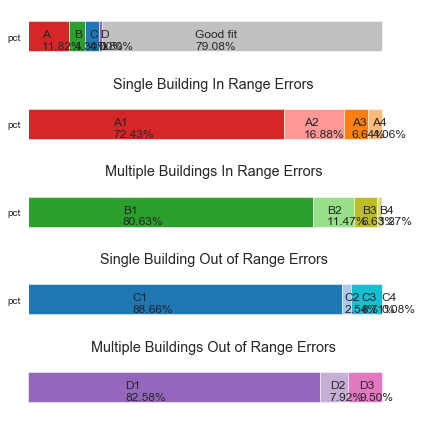

In [24]:
## Plot
meters = ["electricity","chilledwater","steam","hotwater"]

"""palGlobal = ["salmon","yellowgreen","royalblue","mediumorchid","lightgray"]
palA = ["firebrick","salmon","darkorange","sandybrown"]
palB = ["darkgreen", "limegreen", "yellowgreen","palegreen"]
palC = ["mediumblue", "royalblue","dodgerblue","skyblue"]
palD = ["rebeccapurple","mediumorchid","orchid","pink"]"""

palGlobal = [cmap[1],cmap[5],cmap[9],cmap[13],cmap[0]]
palA = [cmap[1],cmap[2],cmap[3],cmap[4]]
palB = [cmap[5],cmap[6],cmap[7],cmap[8]]
palC = [cmap[9],cmap[10],cmap[11],cmap[12]]
palD = [cmap[13],cmap[14],cmap[15],cmap[16]]

fig, axes = plt.subplots(5, 1, sharex=True, sharey=True, figsize=(6,6))
axes = axes.flatten()
plt.rcParams['axes.grid'] = False
plt.axis("off")

# Plot Global
axG = axes[0]
plotG = errors_type.plot(kind='barh', stacked=True, color=palGlobal, ax=axG, width=0.5, legend=False)
axG.set_facecolor('white')
axG.set_xlabel("")
axG.set_ylabel("")

# Show pct on bar
for rec,name in zip(axG.patches,["A","B","C","D","Good fit"]):
    width = rec.get_width()
    height = rec.get_height()

    axG.text(rec.get_x() + width/3, 
            rec.get_y(),
            f"{name}\n"+"{:.2f}%".format(width*100),
            ha='left', 
            va='bottom',
            fontsize=12)

# Plot A
temp = errors_subtype.loc[:,errors_subtype.columns.str.contains("A")]
axA = axes[1]
plotA = temp.plot(kind='barh', stacked=True, color=palA, ax=axA, width=0.5, legend=False)
axA.set_facecolor('white')
axA.set_xlabel("")
axA.set_ylabel("")
axA.set_title("Single Building In Range Errors")

# Show pct on bar
for rec,name in zip(axA.patches,["A1","A2","A3","A4"]):
    width = rec.get_width()
    height = rec.get_height()

    axA.text(rec.get_x() + width/3, 
            rec.get_y(),
            f"{name}\n"+"{:.2f}%".format(width*100),
            ha='left', 
            va='bottom',
            fontsize=12)

# Plot B
temp = errors_subtype.loc[:,errors_subtype.columns.str.contains("B")]
axB = axes[2]
plotB = temp.plot(kind='barh', stacked=True, color=palB, ax=axB, width=0.5, legend=False)
axB.set_facecolor('white')
axB.set_xlabel("")
axB.set_ylabel("")
axB.set_title("Multiple Buildings In Range Errors")

# Show pct on bar
for rec,name in zip(axB.patches,["B1","B2","B3","B4"]):
    width = rec.get_width()
    height = rec.get_height()

    axB.text(rec.get_x() + width/3, 
            rec.get_y(),
            f"{name}\n"+"{:.2f}%".format(width*100),
            ha='left', 
            va='bottom',
            fontsize=12)

# Plot C
temp = errors_subtype.loc[:,errors_subtype.columns.str.contains("C")]
axC = axes[3]
plotC = temp.plot(kind='barh', stacked=True, color=palC, ax=axC, width=0.5, legend=False)
axC.set_facecolor('white')
axC.set_xlabel("")
axC.set_ylabel("")
axC.set_title("Single Building Out of Range Errors")

# Show pct on bar
for rec,name in zip(axC.patches,["C1","C2","C3","C4"]):
    width = rec.get_width()
    height = rec.get_height()

    axC.text(rec.get_x() + width/3, 
            rec.get_y(),
            f"{name}\n"+"{:.2f}%".format(width*100),
            ha='left', 
            va='bottom',
            fontsize=12)

# Plot D
temp = errors_subtype.loc[:,errors_subtype.columns.str.contains("D")]
axD = axes[4]
plotD = temp.plot(kind='barh', stacked=True, color=palD, ax=axD, width=0.5, legend=False)
axD.set_facecolor('white')
axD.set_xlabel("")
axD.set_ylabel("")
axD.set_title("Multiple Buildings Out of Range Errors")

# Show pct on bar
for rec,name in zip(axD.patches,["D1","D2","D3"]):
    width = rec.get_width()
    height = rec.get_height()

    axD.text(rec.get_x() + width/3, 
            rec.get_y(),
            f"{name}\n"+"{:.2f}%".format(width*100),
            ha='left', 
            va='bottom',
            fontsize=12)
    
plt.tight_layout()

fig.savefig(path_fig + "barplot_stacked_global_cb.pdf", dpi=150, bbox_inches="tight")
#fig.savefig(path_fig + "barplot_stacked_global_cb.png", dpi=150, bbox_inches="tight")

### Major group: 1 2 3 4, minor A B C D

In [33]:
def add_total1(x):
    if "1" in x:
        return total_1
    elif "2" in x:
        return total_2
    elif "3" in x:
        return total_3
    elif "4" in x:
        return total_4
    else:
        return np.nan

In [34]:
def type_group1(x):
    if "1" in x:
        return "1"
    elif "2" in x:
        return "2"
    elif "3" in x:
        return "3"
    elif "4" in x:
        return "4"
    else:
        return "Good fit" 

In [35]:
errors1 = errors.copy()
errors1

,error_code,error_count,total,pct,group
0,A1,98754,136352.0,0.724258,A
1,A2,23012,136352.0,0.168769,A
2,A3,9055,136352.0,0.066409,A
3,A4,5531,136352.0,0.040564,A
4,B1,40902,46131.0,0.886649,B
5,B2,1174,46131.0,0.025449,B
6,B3,4016,46131.0,0.087056,B
7,B4,39,46131.0,0.000845,B
8,C1,39996,49604.0,0.806306,C
9,C2,5689,49604.0,0.114688,C


In [36]:
# Totals
total_1 = sum([x for (i,x) in enumerate(errors1.error_count) if "1" in errors1.error_code[i]])
total_2 = sum([x for (i,x) in enumerate(errors1.error_count) if "2" in errors1.error_code[i]])
total_3 = sum([x for (i,x) in enumerate(errors1.error_count) if "3" in errors1.error_code[i]])
total_4 = sum([x for (i,x) in enumerate(errors1.error_count) if "4" in errors1.error_code[i]])
errors1["total"] = [add_total1(x) for x in errors.error_code]
errors1.loc[errors1.error_code == "Good fit", "total"] = errors1.loc[errors1.error_code == "Good fit", "error_count"]
errors1["pct"] = errors1.error_count / errors1.total
errors1["group"] = [type_group1(x) for x in errors1.error_code]

In [37]:
# Grouped by type
errors_type1 = errors1[["group", "error_count"]].groupby("group").sum()
errors_type1["pct"] = errors_type1.error_count / sum(errors_type1.error_count)
errors_type1.drop("error_count",axis=1,inplace=True)

In [38]:
errors_type1 = errors_type1.T
errors_type1

group,1,2,3,4,Good fit
pct,0.162353,0.026534,0.014942,0.005376,0.790795


In [39]:
errors_subtype1 = errors1.drop(["error_count","total","group"],axis=1)
errors_subtype1 = errors_subtype1.set_index("error_code").T
errors_subtype1

error_code,A1,A2,A3,A4,B1,B2,B3,B4,C1,C2,C3,C4,D1,D2,D3,Good fit
pct,0.527369,0.751928,0.525415,0.891953,0.218426,0.038361,0.233028,0.006289,0.213588,0.185891,0.190786,0.101758,0.040618,0.02382,0.050772,1.0


In [40]:
cmap = [color_ref[0],
color_ref[1], 
color_ref[2],
color_ref[3],
color_ref[4], 
color_ref[5], 
color_ref[6], 
color_ref[7], 
color_ref[8],
color_ref[9], 
color_ref[10],
color_ref[11],
color_ref[12],
color_ref[13], 
color_ref[14],
color_ref[15],
color_ref[16],
color_ref[17]]



ref = {0:"Good fit", 
1:"A1", 
2:"A2", 
3:"A3", 
4:"A4", 
5:"B1",
6:"B2",
7:"B3",
8:"B4",
9:"C1",
10:"C2",
11:"C3",
12:"C4",
13:"D1",
14:"D2",
15:"D3",
16:"D4",
17:"Undefined"}

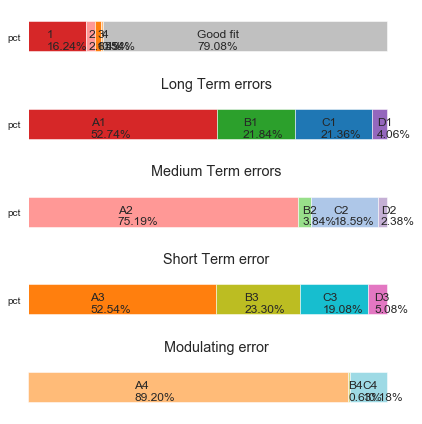

In [47]:
## Plot
palGlobal = [cmap[1],cmap[2],cmap[3],cmap[4],cmap[0]]
pal1 = [cmap[1],cmap[5],cmap[9],cmap[13]]
pal2 = [cmap[2],cmap[6],cmap[10],cmap[14]]
pal3 = [cmap[3],cmap[7],cmap[11],cmap[15]]
pal4 = [cmap[4],cmap[8],cmap[12],cmap[16]]

fig, axes = plt.subplots(5, 1, sharex=True, sharey=True, figsize=(6,6))
axes = axes.flatten()
plt.rcParams['axes.grid'] = False
plt.axis("off")

# Plot Global
axG = axes[0]
plotG = errors_type1.plot(kind='barh', stacked=True, color=palGlobal, ax=axG, width=0.5, legend=False)
axG.set_facecolor('white')
axG.set_xlabel("")
axG.set_ylabel("")

# Show pct on bar
for rec,name in zip(axG.patches,["1","2","3","4","Good fit"]):
    width = rec.get_width()
    height = rec.get_height()

    axG.text(rec.get_x() + width/3, 
            rec.get_y(),
            f"{name}\n"+"{:.2f}%".format(width*100),
            ha='left', 
            va='bottom',
            fontsize=12)

# Plot 1
temp = errors_subtype1.loc[:,errors_subtype1.columns.str.contains("1")]
ax1 = axes[1]
plot1 = temp.plot(kind='barh', stacked=True, color=pal1, ax=ax1, width=0.5, legend=False)
ax1.set_facecolor('white')
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title("Long Term errors")

# Show pct on bar
for rec,name in zip(ax1.patches,["A1","B1","C1","D1"]):
    width = rec.get_width()
    height = rec.get_height()

    ax1.text(rec.get_x() + width/3, 
            rec.get_y(),
            f"{name}\n"+"{:.2f}%".format(width*100),
            ha='left', 
            va='bottom',
            fontsize=12)

# Plot 2
temp = errors_subtype1.loc[:,errors_subtype1.columns.str.contains("2")]
ax2 = axes[2]
plot2 = temp.plot(kind='barh', stacked=True, color=pal2, ax=ax2, width=0.5, legend=False)
ax2.set_facecolor('white')
ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title("Medium Term errors")

# Show pct on bar
for rec,name in zip(ax2.patches,["A2","B2","C2","D2"]):
    width = rec.get_width()
    height = rec.get_height()

    ax2.text(rec.get_x() + width/3, 
            rec.get_y(),
            f"{name}\n"+"{:.2f}%".format(width*100),
            ha='left', 
            va='bottom',
            fontsize=12)

# Plot 3
temp = errors_subtype1.loc[:,errors_subtype1.columns.str.contains("3")]
ax3 = axes[3]
plot3 = temp.plot(kind='barh', stacked=True, color=pal3, ax=ax3, width=0.5, legend=False)
ax3.set_facecolor('white')
ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title("Short Term error")

# Show pct on bar
for rec,name in zip(ax3.patches,["A3","B3","C3","D3"]):
    width = rec.get_width()
    height = rec.get_height()

    ax3.text(rec.get_x() + width/3, 
            rec.get_y(),
            f"{name}\n"+"{:.2f}%".format(width*100),
            ha='left', 
            va='bottom',
            fontsize=12)

# Plot 4
temp = errors_subtype1.loc[:,errors_subtype1.columns.str.contains("4")]
ax4 = axes[4]
plot4 = temp.plot(kind='barh', stacked=True, color=pal4, ax=ax4, width=0.5, legend=False)
ax4.set_facecolor('white')
ax4.set_xlabel("")
ax4.set_ylabel("")
ax4.set_title("Modulating error")

# Show pct on bar
for rec,name in zip(ax4.patches,["A4","B4","C4"]):
    width = rec.get_width()
    height = rec.get_height()

    ax4.text(rec.get_x() + width/3, 
            rec.get_y(),
            f"{name}\n"+"{:.2f}%".format(width*100),
            ha='left', 
            va='bottom',
            fontsize=12)
    
plt.tight_layout()

fig.savefig(path_fig + "barplot_stacked_global_cb1.pdf", dpi=150, bbox_inches="tight")
#fig.savefig(path_fig + "barplot_stacked_global_cb1.png", dpi=150, bbox_inches="tight")

In [41]:
errors_type1

group,1,2,3,4,Good fit
pct,0.162353,0.026534,0.014942,0.005376,0.790795


In [42]:
errors_subtype1

error_code,A1,A2,A3,A4,B1,B2,B3,B4,C1,C2,C3,C4,D1,D2,D3,Good fit
pct,0.527369,0.751928,0.525415,0.891953,0.218426,0.038361,0.233028,0.006289,0.213588,0.185891,0.190786,0.101758,0.040618,0.02382,0.050772,1.0


## Figure 8
Frequency and rmsle barplots aggregated by error type (A, B, C, D), one bar per meter (needs figure 10 data)

### Freq data

In [51]:
errors_type_list = []
errors_subtype_list = []

for errors,meter in zip(error_list,meters):
    #errors = errors[errors.error_code != "Good fit"]
    # Totals
    total_GF = sum([x for (i,x) in enumerate(errors.error_count) if "Good fit" in errors.error_code[i]])
    total_A = sum([x for (i,x) in enumerate(errors.error_count) if "A" in errors.error_code[i]])
    total_B = sum([x for (i,x) in enumerate(errors.error_count) if "B" in errors.error_code[i]])
    total_C = sum([x for (i,x) in enumerate(errors.error_count) if "C" in errors.error_code[i]])
    total_D = sum([x for (i,x) in enumerate(errors.error_count) if "D" in errors.error_code[i]])
    errors["total"] = [add_total(x) for x in errors.error_code]
    errors.loc[errors.error_code == "Good fit", "total"] = errors.loc[errors.error_code == "Good fit", "error_count"]
    errors["pct"] = errors.error_count / errors.total
    errors["group"] = [type_group(x) for x in errors.error_code]
    # Grouped by type
    errors_type = errors[["group", "error_count"]].groupby("group").sum()
    errors_type["pct"] = errors_type.error_count / sum(errors_type.error_count)
    errors_type.drop("error_count",axis=1,inplace=True)
    errors_type = errors_type.T
    errors_type["meter"] = meter
    errors_type_list.append(errors_type)

errors_type = pd.concat(errors_type_list).set_index("meter")

In [52]:
errors_type

group,A,B,C,D,Good fit
meter,,,,,
electricity,0.058074,0.012048,0.017233,0.009214,0.903431
chilledwater,0.210278,0.042072,0.068343,0.003880,0.675426
steam,0.202369,0.076449,0.062358,0.002423,0.656401
hotwater,0.183624,0.221451,0.169178,0.025623,0.400125


### RMSLE data

In [53]:
# Dataset for ploting good fit/in range error/out of range error

## Load metadata
meta = pd.read_csv(path_meta + "building_metadata.csv",usecols=["building_id","site_id"])

rmsle_list = [] # this will be for plotting rmsle magnitude

for meter in meters:
    print(f"\nMETER: {meter}")

    df_rmsle_list = []

    for site in sites:

        try:
            df_error, error_types = error_df_all(path_res, meter, site)
            """# This will be used for the frequrency barplots
            df_freq = df_error.melt().groupby("value").count().reset_index().rename(columns={"value":"error_code","variable":"error_count"})
            df_freq["site_id"] = site
            df_freq["total"] = df_freq.error_count.sum()
            df_list.append(df_freq)"""

        except:
            print(f"Site {site} not available.")
            continue

        # This will be used for the rmsle barplot
        df_rmsle = df_error.reset_index().melt(id_vars="building_id", var_name="timestamp") # errors df
        df_rmsle.timestamp = pd.to_datetime(df_rmsle.timestamp, format="%Y-%m-%d")
        # Add site_id
        df_rmsle["site_id"] = site
        # Add to list
        df_rmsle_list.append(df_rmsle)

    # Creates rmsle df
    errors = pd.concat(df_rmsle_list)
    errors.timestamp = pd.to_datetime(errors.timestamp, format="%Y-%m-%d")
    errors.rename(columns={"value":"error"},inplace=True)
    ## Load RMSLE dataframe
    df1 = pd.read_pickle(path_data + f"{meter}_RMSLE.pickle.gz")
    df1.timestamp = pd.to_datetime(df1.timestamp, format="%Y-%m-%d")
    ## Add site_id
    df1 = pd.merge(df1,meta,how="left",on="building_id")
    ## Merge
    rmsle = pd.merge(errors, df1, how="left", on=["building_id","site_id","timestamp"])
    ## Sums RMSLE metric for each error type in site
    sums = pd.DataFrame(rmsle.groupby(["site_id","error"])["rmsle"].sum()).reset_index()
    # Replace error name
    sums["error"] = [error_group(x) for x in sums.error]
    # Group
    sums = pd.DataFrame(sums.groupby("error")["rmsle"].sum())
    # Add pct
    total = sums.rmsle.sum()
    sums["pct"] = sums.rmsle / total
    sums = sums[["pct"]].T
    # Add meter
    sums["meter"] = meter
    # append
    rmsle_list.append(sums)


METER: electricity
Site 0 not available.
Site 1 not available.
Site 2 not available.
Site 3 error's dataframe created.
Site 4 error's dataframe created.
Site 5 error's dataframe created.
Site 6 error's dataframe created.
Site 7 error's dataframe created.
Site 8 error's dataframe created.
Site 9 error's dataframe created.
Site 10 error's dataframe created.
Site 11 error's dataframe created.
Site 12 error's dataframe created.
Site 13 error's dataframe created.
Site 14 error's dataframe created.
Site 15 not available.

METER: chilledwater
Site 0 not available.
Site 1 not available.
Site 2 not available.
Site 3 not available.
Site 4 not available.
Site 5 not available.
Site 6 error's dataframe created.
Site 7 error's dataframe created.
Site 8 not available.
Site 9 error's dataframe created.
Site 10 error's dataframe created.
Site 11 error's dataframe created.
Site 12 not available.
Site 13 error's dataframe created.
Site 14 error's dataframe created.
Site 15 not available.

METER: steam
S

In [54]:
rmsle = pd.concat(rmsle_list).set_index("meter")
rmsle

error,A,B,C,D,good_fit
meter,,,,,
electricity,0.191613,0.045967,0.154366,0.077433,0.530621
chilledwater,0.330922,0.070450,0.282598,0.015900,0.300131
steam,0.325648,0.126189,0.247800,0.010921,0.289442
hotwater,0.183208,0.226685,0.396610,0.066438,0.127060


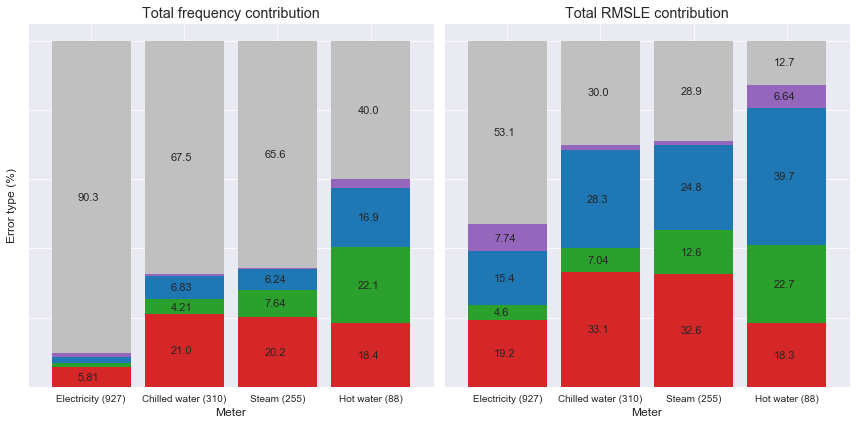

In [55]:
## Plot
meters = ["electricity","chilledwater","steam","hotwater"]

palGlobal = [cmap[1],cmap[5],cmap[9],cmap[13],cmap[0]]

fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12,6))
axes = axes.flatten()
plt.rcParams['axes.grid'] = True

# Plot freq
axF = axes[0]
plotF = errors_type.plot(kind='bar', stacked=True, color=palGlobal, ax=axF, width=0.85, legend=False, linewidth=0)
axF.set_xlabel("Meter")
axF.set_xticklabels([f"{meters_name[meter].capitalize()} ({meters_per_meter[meter]})" for meter in meters], rotation=0)
axF.set_ylabel("Error type (%)")
axF.set_title("Total frequency contribution")

# Show pct on bar
for rec in axF.patches:
    width = rec.get_width()
    height = rec.get_height()
    if height >= 0.03:
        axF.text(rec.get_x() + width/3, 
                rec.get_y() + height/2,
                f"{round_sig(height*100,sig=3)}",
                ha='left', 
                va='center',
                fontsize=11)

# Plot rmsle
axR = axes[1]
plotR = rmsle.plot(kind='bar', stacked=True, color=palGlobal, ax=axR, width=0.85, legend=False, linewidth=0)
axR.set_xlabel("Meter")
axR.set_xticklabels([f"{meters_name[meter].capitalize()} ({meters_per_meter[meter]})" for meter in meters], rotation=0)
axR.set_yticklabels([])
axR.set_ylabel("Error type (%)")
axR.set_title("Total RMSLE contribution")

# Show pct on bar
for rec in axR.patches:
    width = rec.get_width()
    height = rec.get_height()
    if height >= 0.03:
        axR.text(rec.get_x() + width/3, 
                rec.get_y() + height/2,
                f"{round_sig(height*100,sig=3)}",
                ha='left', 
                va='center',
                fontsize=11)

'''handles,labels = axR.get_legend_handles_labels()
labels = ["A","B","C","D","Good fit"]
axR.legend(handles,labels,title='', loc="upper center", fontsize=10, ncol=5, bbox_to_anchor=(0.5, -0.07))'''    

plt.tight_layout()

fig.savefig(path_fig + "barplot_stacked_meter_cb.pdf", dpi=150, bbox_inches="tight")
#fig.savefig(path_fig + "barplot_stacked_meter_cb.png", dpi=150, bbox_inches="tight")

## Figure 9
Frequency and rmsle barplots aggregated by error type (A, B, C, D), one bar per primary use of building.

In [41]:
meters = ["electricity","chilledwater","steam","hotwater"]

In [42]:
sites

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [44]:
## Load metadata
meta = pd.read_csv(path_meta + "building_metadata.csv",usecols=["building_id","primary_use"])

freq_list = []
rmsle_list = []

for meter in meters:
    print(f"\nMETER: {meter}")

    df_list = []
    df_rmsle_list = []

    for site in sites:

        try:
            df_error, error_types = error_df_all(path_res, meter, site)
            # This will be used for the frequrency barplots
            df_freq = df_error.reset_index().melt(id_vars="building_id").groupby(["building_id","value"]).count().reset_index().rename(columns={"value":"error_code","variable":"error_count"})
            df_freq["site_id"] = site
            df_freq["total"] = df_freq.error_count.sum()
            df_list.append(df_freq)

        except:
            print(f"Site {site} not available.")
            continue

        # This will be used for the rmsle barplot
        df_rmsle = df_error.reset_index().melt(id_vars="building_id", var_name="timestamp") # errors df
        df_rmsle.timestamp = pd.to_datetime(df_rmsle.timestamp, format="%Y-%m-%d")
        # Add to list
        df_rmsle_list.append(df_rmsle)
    
    # Creates rmsle df
    errors = pd.concat(df_rmsle_list)
    errors.timestamp = pd.to_datetime(errors.timestamp, format="%Y-%m-%d")
    errors.rename(columns={"value":"error"},inplace=True)
    ## Load RMSLE dataframe
    df1 = pd.read_pickle(path_data + f"{meter}_RMSLE.pickle.gz")
    df1.timestamp = pd.to_datetime(df1.timestamp, format="%Y-%m-%d")
    ## Merge metadata
    df1 = pd.merge(df1,meta,how="left",on="building_id")
    ## Merge
    rmsle = pd.merge(errors, df1, how="left", on=["building_id","timestamp"])
    ## Sums RMSLE metric for each error type in primary_use
    sums = pd.DataFrame(rmsle.groupby(["primary_use","error"])["rmsle"].sum()).reset_index()
    # Replace error name
    sums["error"] = [error_group(x) for x in sums.error]
    # append
    rmsle_list.append(sums)

    # Create frequency dfs
    df = pd.concat(df_list)
    # Tag errors
    df["error"] = [error_group(x) for x in df.error_code]
    # Group
    df = df[["building_id","error","error_count"]].groupby(["building_id","error"]).sum().reset_index()
    # Append to list
    freq_list.append(df)

# concat all meters
freqs = pd.concat(freq_list)
freqs = pd.DataFrame(pd.merge(freqs, meta, on="building_id").groupby(["primary_use","error"])["error_count"].sum()).reset_index()
freqs = freqs.pivot(index="primary_use",columns="error",values="error_count")

rmsle = pd.concat(rmsle_list)
rmsle = pd.DataFrame(rmsle.groupby(["primary_use","error"])["rmsle"].sum())
rmsle = rmsle.reset_index()[["primary_use","error","rmsle"]]
rmsle = rmsle.pivot_table(index="primary_use", columns="error", values="rmsle")


METER: electricity
Site 0 not available.
Site 1 not available.
Site 2 not available.
Site 3 error's dataframe created.
Site 4 error's dataframe created.
Site 5 error's dataframe created.
Site 6 error's dataframe created.
Site 7 error's dataframe created.
Site 8 error's dataframe created.
Site 9 error's dataframe created.
Site 10 error's dataframe created.
Site 11 error's dataframe created.
Site 12 error's dataframe created.
Site 13 error's dataframe created.
Site 14 error's dataframe created.
Site 15 not available.

METER: chilledwater
Site 0 not available.
Site 1 not available.
Site 2 not available.
Site 3 not available.
Site 4 not available.
Site 5 not available.
Site 6 error's dataframe created.
Site 7 error's dataframe created.
Site 8 not available.
Site 9 error's dataframe created.
Site 10 error's dataframe created.
Site 11 error's dataframe created.
Site 12 not available.
Site 13 error's dataframe created.
Site 14 error's dataframe created.
Site 15 not available.

METER: steam
S

### Calculate pct

In [45]:
rmsle["total"] = rmsle.sum(axis=1)
rmsle.A = rmsle.A / rmsle.total
rmsle.B = rmsle.B / rmsle.total
rmsle.C = rmsle.C / rmsle.total
rmsle.D = rmsle.D / rmsle.total
rmsle.good_fit = rmsle.good_fit / rmsle.total
rmsle.drop("total",axis=1, inplace=True)
rmsle

error,A,B,C,D,good_fit
primary_use,,,,,
Education,0.235942,0.119379,0.231346,0.061544,0.351789
Entertainment/public assembly,0.270147,0.076102,0.263380,0.060776,0.329594
Food sales and service,0.200944,0.062800,0.399241,0.004443,0.332572
Healthcare,0.282115,0.066121,0.272869,0.027337,0.351558
Lodging/residential,0.234871,0.092974,0.268533,0.013122,0.390500
Manufacturing/industrial,0.275249,0.062816,0.053733,0.218151,0.390051
Office,0.303670,0.077448,0.265404,0.019276,0.334202
Other,0.381045,0.141200,0.115026,0.013066,0.349662
Parking,0.111483,0.004971,0.010542,NaN,0.873004


In [46]:
freqs["total"] = freqs.sum(axis=1)
freqs.A = freqs.A / freqs.total
freqs.B = freqs.B / freqs.total
freqs.C = freqs.C / freqs.total
freqs.D = freqs.D / freqs.total
freqs.good_fit = freqs.good_fit / freqs.total
freqs.drop("total",axis=1, inplace=True)
freqs

error,A,B,C,D,good_fit
primary_use,,,,,
Education,0.110677,0.050786,0.041908,0.011773,0.784856
Entertainment/public assembly,0.137986,0.033669,0.055091,0.012669,0.760585
Food sales and service,0.148801,0.044007,0.093836,0.001370,0.711986
Healthcare,0.142147,0.034087,0.045651,0.006180,0.771934
Lodging/residential,0.096251,0.036912,0.048614,0.002315,0.815907
Manufacturing/industrial,0.102366,0.020299,0.011083,0.035118,0.831133
Office,0.146809,0.037041,0.050053,0.003562,0.762535
Other,0.153842,0.048303,0.022394,0.002799,0.772662
Parking,0.026256,0.001027,0.000799,NaN,0.971918


In [47]:
freqs = freqs.sort_values("good_fit", ascending=False)
rmsle = rmsle.reindex(freqs.index)

### Plot

In [ ]:
## Plot
ticks = [f"{x} ({meters_per_use[x]})" for x in freqs.index]
palGlobal = [cmap[1],cmap[5],cmap[9],cmap[13],cmap[0]]

fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12,6))
axes = axes.flatten()
plt.rcParams['axes.grid'] = True

# Plot freq
axF = axes[0]
plotF = freqs.plot(kind='barh', stacked=True, color=palGlobal, ax=axF, width=0.5, legend=False, linewidth=0)
axF.set_xlabel("Amount of error by primary use (%)")
axF.set_xticklabels([], rotation=0)
axF.set_yticklabels(ticks, rotation=0, fontsize=12)
axF.set_ylabel("Primary use")
axF.set_title("Total frequency contribution")

# Show pct on bar
for rec in axF.patches:
    width = rec.get_width()
    height = rec.get_height()
    if width >= 0.03:
        axF.text(rec.get_x() + width/3, 
                rec.get_y() + height/2,
                f"{round_sig(width*100,sig=3)}",
                ha='left', 
                va='center',
                fontsize=9)

# Plot rmsle
axR = axes[1]
plotR = rmsle.plot(kind='barh', stacked=True, color=palGlobal, ax=axR, width=0.5, legend=False, linewidth=0)
axR.set_xlabel("Amount of error by primary use (%)")
axR.set_xticklabels([], rotation=0)
axR.set_yticklabels(ticks, rotation=0)
axR.set_ylabel("Primary use")
axR.set_title("Total RMSLE contribution")

# Show pct on bar
for rec in axR.patches:
    width = rec.get_width()
    height = rec.get_height()
    if width >= 0.03:
        axR.text(rec.get_x() + width/3, 
                rec.get_y() + height/2,
                f"{round_sig(width*100,sig=3)}",
                ha='left', 
                va='center',
                fontsize=9)

'''handles,labels = axR.get_legend_handles_labels()
labels = ["A","B","C","D","Good fit"]
plt.legend(handles, labels, loc="lower center", ncol=5, bbox_to_anchor=(0.5, -0.07))'''

plt.tight_layout()

fig.savefig(path_fig + "barplot_stacked_meter_primary_use.pdf", dpi=150, bbox_inches="tight")
fig.savefig(path_fig + "barplot_stacked_meter_primary_use.png", dpi=150, bbox_inches="tight")

## Color bar

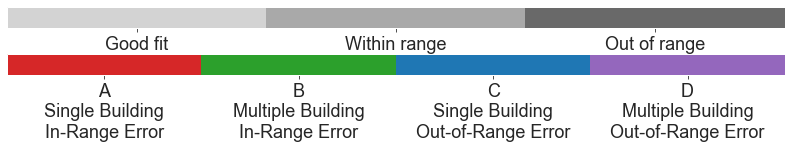

In [67]:
fig = plt.figure(figsize=(12, 2))

ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
ax2 = fig.add_axes([0.05, 0.475, 0.9, 0.15])

pal1 =["lightgray","darkgray","dimgrey"]
pal2 = [cmap[1],cmap[5],cmap[9],cmap[13]]

#tick_locs = ((np.arange(8) + 0.5)*(8-1)/8) + 1

###########################################################
cmap1 = ListedColormap(pal1)
tick_labels1 = ["Good fit","Within range","Out of range"]
tick_locs1 = (np.arange(3) + 0.5)
norm1 = mpl.colors.Normalize(vmin=0, vmax=3)
cb1 = mpl.colorbar.ColorbarBase(ax1, 
                                cmap=cmap1,
                                ticks=tick_locs1,
                                norm=norm1,
                                orientation='horizontal')
cb1.set_ticklabels(tick_labels1)
cb1.ax.tick_params(labelsize=18)
###########################################################
cmap2 = ListedColormap(pal2)
tick_labels2 = ["A\nSingle Building\nIn-Range Error","B\nMultiple Building\nIn-Range Error",
                "C\nSingle Building\nOut-of-Range Error","D\nMultiple Building\nOut-of-Range Error"]
tick_locs2 = (np.arange(4) + 0.5)
norm2 = mpl.colors.Normalize(vmin=0, vmax=4)
cb2 = mpl.colorbar.ColorbarBase(ax2, 
                                cmap=cmap2,
                                ticks=tick_locs2,
                                norm=norm2,
                                orientation='horizontal')
cb2.set_ticklabels(tick_labels2)
cb2.ax.tick_params(labelsize=18)
###########################################################

plt.show()

fig.savefig(path_fig + f"colorbar_group.pdf", dpi=150, bbox_inches="tight")

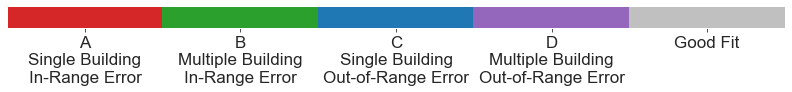

In [69]:
fig = plt.figure(figsize=(12, 2))

ax3 = fig.add_axes([0.05, 0.15, 0.9, 0.15])

pal3 = [cmap[1],cmap[5],cmap[9],cmap[13],cmap[0]]

#tick_locs = ((np.arange(8) + 0.5)*(8-1)/8) + 1

###########################################################
cmap3 = ListedColormap(pal3)
tick_labels3 = ["A\nSingle Building\nIn-Range Error","B\nMultiple Building\nIn-Range Error",
                "C\nSingle Building\nOut-of-Range Error","D\nMultiple Building\nOut-of-Range Error",
                "Good Fit"]
tick_locs3 = (np.arange(5) + 0.5)
norm3 = mpl.colors.Normalize(vmin=0, vmax=5)
cb3 = mpl.colorbar.ColorbarBase(ax3, 
                                cmap=cmap3,
                                ticks=tick_locs3,
                                norm=norm3,
                                orientation='horizontal')
cb3.set_ticklabels(tick_labels3)
cb3.ax.tick_params(labelsize=17)
###########################################################

plt.show()

fig.savefig(path_fig + f"colorbar_group2.pdf", dpi=150, bbox_inches="tight")